### Data Science Test: Stock Price Data Analysis for BPCL Company - (Local machine code)

**Objective:** The objective of this test is to build a Jupyter notebook that will retrieve historical stock price data for **BPCL (Bharat Petroleum Corporation Limited)** from data.nasdaq.com and perform the following tasks:
1. Plot the raw stock prices over time.
2. Correct the stock prices for any splits and consolidations that have occurred.
3. Display the final adjusted stock prices.
4. Show the dates for any splits and consolidations that have occurred.

**Data Source:** The stock price data for BPCL will be fetched from data.nasdaq.com. The data should be retrieved for the last 5 years (or as much data as is available).

**Data Processing:**
1. Plot the raw stock prices over time using a line graph.
2. Programmatically detect any splits and consolidations that have occurred.
3. Correct the stock prices for any splits and consolidations that have occurred.
4. Display the final adjusted stock prices.
5. Show the dates for any splits and consolidations that have occurred.

**Output:** The final output of the Jupyter notebook should be a line graph showing the adjusted stock prices over time, with split and consolidation events marked on the graph.

**Technology Requirements:**
- The Jupyter notebook should be written in Python.
- The stock price data should be retrieved using the data.nasdaq.com API.
- The line graph should be generated using a plotting library such as Matplotlib or Seaborn.

**Deliverables:**
1. The completed Jupyter notebook that meets the requirements outlined above.
2. A brief summary of your findings and observations from the analysis of the BPCL stock price data.
3. All source code and supporting documentation necessary to run the Jupyter notebook on a computer with Python and the required libraries installed.

**Timeline:** The test should be completed within 1 week from the start date.

**Note:** It is important to note that the stock price data is subject to change, so the results of this analysis may differ from one run to another. The focus of this test is not on providing an accurate prediction of stock prices, but on demonstrating the ability to retrieve and process stock price data using a Jupyter notebook.

**Useful Information:**
- A stock split occurs when a company increases the number of shares outstanding by issuing more shares to shareholders, while reducing the price of each share in proportion.
- A stock consolidation, also known as a reverse split, is the opposite of a stock split. In a consolidation, the number of shares outstanding is reduced by retiring some of the shares and increasing the price of each remaining share in proportion.


#### Conclusion:
The project is a comprehensive analysis of BPCL stock price data using Python programming language, data.nasdaq.com API, and a plotting library such as Matplotlib or Seaborn. The deliverables of the project include a completed Jupyter Notebook, a brief summary of the findings, and all the source code and supporting documentation necessary to run the Notebook. By following the instructions and running the Notebook, you can generate a line graph of BPCL stock price data and gain valuable insights into the stock performance.

In [4]:
# Resources / documentation and links for this project:-

# https://data.nasdaq.com/data/BSE/documentation
# https://docs.data.nasdaq.com/docs/in-depth-usage
# https://data.nasdaq.com/login
# https://data.nasdaq.com/account/profile
# https://data.nasdaq.com/data/BSE/BOM500547

# https://github.com/quandl/quandl-python
# https://github.com/Nasdaq/data-link-python


# Here is a brief description of each column in the dataset:

# Open: The opening price of the stock on a particular day.
# High: The highest price at which the stock traded during the day.
# Low: The lowest price at which the stock traded during the day.
# Close: The closing price of the stock on a particular day.
# WAP: Weighted Average Price, which is the average of the high, low, and closing prices 
#      weighted by trading volume.
# No. of Shares: The total number of shares traded on a particular day.
# No. of Trades: The total number of trades executed on a particular day.
# Total Turnover: The total value of all trades executed on a particular day.
# Deliverable Quantity: The number of shares that were delivered (actually traded) on a 
#                         particular day.
# % Deli. Qty to Traded Qty: The percentage of deliverable quantity to the total traded quantity.
# Spread H-L: The difference between the high and low prices on a particular day.
# Spread C-O: The difference between the closing and opening prices on a particular day.


In [5]:
# Since Quandl is accured by Nasdaq. I will use the Nasdaq-Data-Link package.
# Still Quandl python package can also be used.
# Quandl Github repository (read-only):- https://github.com/quandl/quandl-python
# Nasdaq Github repository:- https://github.com/Nasdaq/data-link-python

# pip installing all the necessary libraries required for project.
!pip install matplotlib==3.8.3
!pip install seaborn==0.13.2
!pip install Nasdaq-Data-Link==1.0.4
# !pip install Quandl==3.7.0
!pip install pandas==2.2.1
!pip install numpy==1.26.4


### Please paste you api_key in config.py file 
<font color = red > Just for the sake of simplicity environment variable or dotenv api encryption is not done </font>

In [6]:
import matplotlib     # For Plotting / Visualization
import seaborn        # For Plotting / Visualization
import nasdaqdatalink # For Accessing BPCL API from data.nasdaq.com
# import quandl       # For Accessing BPCL API from data.nasdaq.com
import pandas         # For manipulation of the data.
import numpy          # For fast numeric computation.
import config         # For storing api key as secret.
import sys            # For printing python version

print(f'''
    python version:- {sys.version.split(' ')[0]} 
    matplotlib version:- {matplotlib.__version__}
    seaborn version:- {seaborn.__version__}
    pandas version:- {pandas.__version__} 
    numpy version:- {numpy.__version__}
''')

!pip show Nasdaq-Data-Link
# print("\n")
# !pip show quandl

from matplotlib import pyplot as plt, dates as mdates
import seaborn as sns
import nasdaqdatalink as nddl
# import quandl
import pandas as pd
import numpy as np
import config
from datetime import datetime
from dateutil.relativedelta import relativedelta


    python version:- 3.10.12 
    matplotlib version:- 3.8.3
    seaborn version:- 0.13.2
    pandas version:- 2.2.1 
    numpy version:- 1.26.4



Name: Nasdaq-Data-Link
Version: 1.0.4
Summary: Package for Nasdaq Data Link API access
Home-page: https://github.com/Nasdaq/data-link-python
Author: Nasdaq Data Link
Author-email: connect@data.nasdaq.com
License: MIT
Location: /home/viddesh/Desktop/stock/.venv/lib/python3.10/site-packages
Requires: inflection, more-itertools, numpy, pandas, python-dateutil, requests, six
Required-by: 


In [7]:
# Steps for getting an API key from data.nasdaq.com
# Login to data.nasdaq.com:- https://data.nasdaq.com/login
# Click on Data link in Work.
# Login to your account of data.nasdaq.com. 
# In your profile got to account settings:- https://data.nasdaq.com/account/profile
# You can find your API key there!

# This is the value of my api key
API_KEY = config.api_key # create a config.py with text api_key = "YOUR_API_KEY"
# print(API_KEY)

# I used VPN for getting my API key. Because, website was loading infinitely.
#  Probabaly because of firewall or ISP issue.

In [8]:
# https://data.nasdaq.com/data/BSE-bombay-stock-exchange/documentation
# (BPCL)Bharat Petroleum Corporation Ltd stock access using (BSE) Bombay Stock Exchange. 
# In that I can find the code Bharat Petroleum Corporation Ltd. EOD Prices|BOM500547
# OR
# Clicking on the https://data.nasdaq.com/api/v3/databases/BSE/metadata?api_key=<YOURAPIKEY>
# will download zip file. after unzipping i can find same code Bharat Petroleum Corporation Ltd. EOD Prices|BOM500547
# every single stock has its own unique code and while we fetch our data this is the code that I found for the task

BPCL_code = 'BSE/BOM500547' 

# For more information:- https://data.nasdaq.com/data/BSE/BOM500547.

In [9]:
#Here we are getting the values for the start date and the end date for which we want the data
#As mentioned in the requirements we need the data for the past 5 years so our start date will be current - 5 

CURRENT_DATE = datetime.now()
START_DATE = CURRENT_DATE - relativedelta(years = 25) # 5
START_DATE = datetime.strftime(START_DATE , '%Y-%m-%d')
CURRENT_DATE = datetime.strftime(CURRENT_DATE, '%Y-%m-%d')
START_DATE , CURRENT_DATE

('1999-03-07', '2024-03-07')

In [10]:
nddl.ApiConfig.api_key = API_KEY
bpcl_df = nddl.get(BPCL_code, start_date= START_DATE, end_date=CURRENT_DATE, collapse = 'daily' , order = 'asc')
bpcl_df

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
Date,,,,,,,,,,,,
1999-03-09,192.90,204.9,190.0,204.90,198.110253,517447.0,1931.0,102511556.0,NaN,NaN,14.9,12.00
1999-03-10,206.00,221.2,206.0,214.00,216.540271,597056.0,1863.0,129286668.0,NaN,NaN,15.2,8.00
1999-03-11,216.00,218.0,200.0,202.60,207.337453,119418.0,676.0,24759824.0,NaN,NaN,18.0,-13.40
1999-03-12,203.10,204.0,196.7,201.30,199.728773,119520.0,576.0,23871583.0,NaN,NaN,7.3,-1.80
1999-03-15,201.50,204.9,197.0,197.50,199.746789,69598.0,313.0,13901977.0,NaN,NaN,7.9,-4.00
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-28,354.15,357.9,352.3,355.40,355.840000,119951.0,2735.0,42683675.0,45941.0,38.30,5.6,1.25
2023-08-29,355.45,358.6,354.8,356.75,356.570000,127645.0,3426.0,45513748.0,65664.0,51.44,3.8,1.30
2023-08-30,353.50,354.8,350.3,351.80,352.210000,126595.0,2200.0,44587812.0,45452.0,35.90,4.5,-1.70


In [11]:
bpcl_df.info() # Information of all the dataframe columns and there datatypes.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4118 entries, 1999-03-09 to 2023-09-01
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Open                       4118 non-null   float64
 1   High                       4118 non-null   float64
 2   Low                        4118 non-null   float64
 3   Close                      4118 non-null   float64
 4   WAP                        4118 non-null   float64
 5   No. of Shares              4118 non-null   float64
 6   No. of Trades              4118 non-null   float64
 7   Total Turnover             4118 non-null   float64
 8   Deliverable Quantity       3775 non-null   float64
 9   % Deli. Qty to Traded Qty  3775 non-null   float64
 10  Spread H-L                 4118 non-null   float64
 11  Spread C-O                 4118 non-null   float64
dtypes: float64(12)
memory usage: 418.2 KB


In [12]:
bpcl_df.tail()

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
Date,,,,,,,,,,,,
2023-08-28,354.15,357.9,352.3,355.40,355.84,119951.0,2735.0,42683675.0,45941.0,38.30,5.6,1.25
2023-08-29,355.45,358.6,354.8,356.75,356.57,127645.0,3426.0,45513748.0,65664.0,51.44,3.8,1.30
2023-08-30,353.50,354.8,350.3,351.80,352.21,126595.0,2200.0,44587812.0,45452.0,35.90,4.5,-1.70
2023-08-31,351.75,352.1,339.1,340.55,343.91,149427.0,3711.0,51388931.0,85726.0,57.37,13.0,-11.20
2023-09-01,340.60,345.0,340.6,344.10,343.19,227077.0,6546.0,77930714.0,92838.0,40.88,4.4,3.50


In [13]:
bpcl_df.head()

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
Date,,,,,,,,,,,,
1999-03-09,192.9,204.9,190.0,204.9,198.110253,517447.0,1931.0,102511556.0,NaN,NaN,14.9,12.0
1999-03-10,206.0,221.2,206.0,214.0,216.540271,597056.0,1863.0,129286668.0,NaN,NaN,15.2,8.0
1999-03-11,216.0,218.0,200.0,202.6,207.337453,119418.0,676.0,24759824.0,NaN,NaN,18.0,-13.4
1999-03-12,203.1,204.0,196.7,201.3,199.728773,119520.0,576.0,23871583.0,NaN,NaN,7.3,-1.8
1999-03-15,201.5,204.9,197.0,197.5,199.746789,69598.0,313.0,13901977.0,NaN,NaN,7.9,-4.0


In [14]:
bpcl_df.isnull().sum() # Checking for null values

Open                           0
High                           0
Low                            0
Close                          0
WAP                            0
No. of Shares                  0
No. of Trades                  0
Total Turnover                 0
Deliverable Quantity         343
% Deli. Qty to Traded Qty    343
Spread H-L                     0
Spread C-O                     0
dtype: int64

### Task 1 
1. Plot the raw stock prices over time using a line plot.

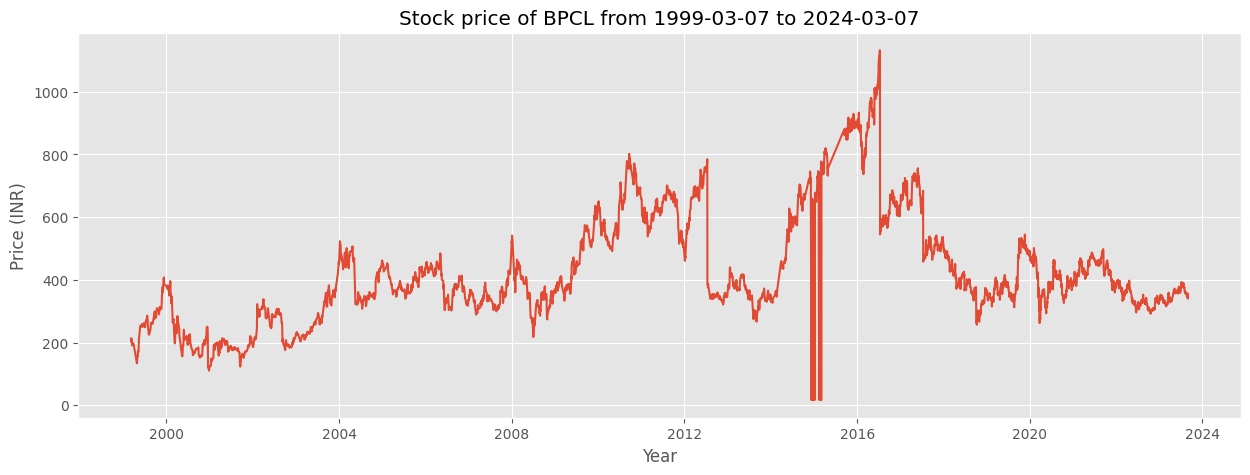

In [15]:
# Line plot

plt.style.use('ggplot')
plt.figure(figsize =[15,5] )
plt.plot(bpcl_df.index , bpcl_df['Close']  , linewidth = 1.5)
plt.xlabel('Year')
plt.ylabel('Price (INR)')
# plt.grid(visible = True)
plt.title(f'Stock price of BPCL from {START_DATE} to {CURRENT_DATE}')
plt.show()

# Apart from the recurrent spikes from 2014 to 2015 if we observe data carefully then we get 
# 5 different spikes on Close and Open raw data line plot.
# One in 2000, 2004, 2012, 2016, 2017 

# I have to find sudden drop or increase in the stock price.

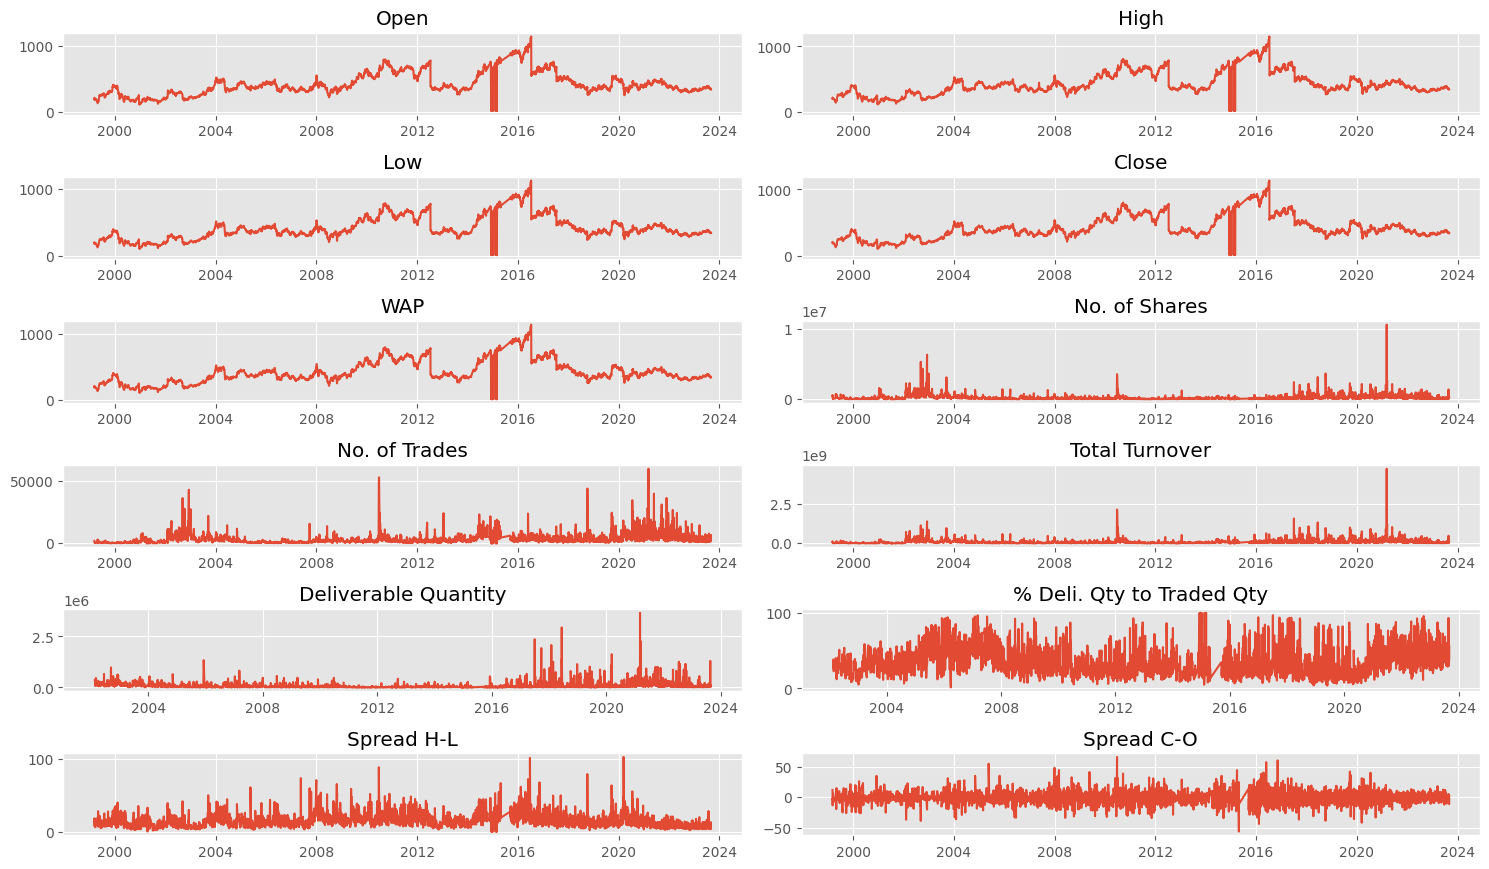

In [16]:
plt.figure(figsize = [15,10])
position = 1 
for column in bpcl_df.columns:
    plt.subplot(7,2, position)
    plt.plot(bpcl_df[column])
    plt.title(column)
    position+=1 
    plt.tight_layout()
plt.show()
# There are few spikes in No. of shares, Total Turnover, No of Trades and Close and Open column

### Filling missing values

In [17]:
bpcl_df.columns

Index(['Open', 'High', 'Low', 'Close', 'WAP', 'No. of Shares', 'No. of Trades',
       'Total Turnover', 'Deliverable Quantity', '% Deli. Qty to Traded Qty',
       'Spread H-L', 'Spread C-O'],
      dtype='object')

In [18]:
# columns_to_interpolate = ['Deliverable Quantity', '% Deli. Qty to Traded Qty']

# for column in columns_to_interpolate:
#     bpcl_df[column] = bpcl_df[column].interpolate(method='linear')
   
# Checking or null values
# bpcl_df.isna().sum()

# columns_to_fill = ['Deliverable Quantity', '% Deli. Qty to Traded Qty']

# for column in columns_to_fill:
#     bpcl_df[column].fillna(bpcl_df[column].mean(), inplace=True)

# # Display the DataFrame after filling missing values
# bpcl_df.isna().sum()


### Nothing conclusive could be said so let's try fetching transformed data

In [19]:
nddl.ApiConfig.api_key = API_KEY
df = nddl.get(BPCL_code, start_date= START_DATE, end_date=CURRENT_DATE, collapse = 'daily' , order = 'asc' , transform = 'diff')
# The 'diff' transformation calculates the difference between each value and the previous value 
# in the dataset. 
# This can be useful for analyzing the day-to-day changes in stock prices.
df

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
Date,,,,,,,,,,,,
1999-03-10,13.10,16.3,16.00,9.10,18.430018,79609.0,-68.0,26775112.0,NaN,NaN,0.30,-4.00
1999-03-11,10.00,-3.2,-6.00,-11.40,-9.202818,-477638.0,-1187.0,-104526844.0,NaN,NaN,2.80,-21.40
1999-03-12,-12.90,-14.0,-3.30,-1.30,-7.608680,102.0,-100.0,-888241.0,NaN,NaN,-10.70,11.60
1999-03-15,-1.60,0.9,0.30,-3.80,0.018015,-49922.0,-263.0,-9969606.0,NaN,NaN,0.60,-2.20
1999-03-16,-5.40,-4.9,-8.00,-6.50,-5.302140,-14559.0,26.0,-3199938.0,NaN,NaN,3.10,-1.10
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-28,3.05,3.8,2.95,5.20,3.720000,-3133.0,411.0,-656415.0,9568.0,8.75,0.85,2.15
2023-08-29,1.30,0.7,2.50,1.35,0.730000,7694.0,691.0,2830073.0,19723.0,13.14,-1.80,0.05
2023-08-30,-1.95,-3.8,-4.50,-4.95,-4.360000,-1050.0,-1226.0,-925936.0,-20212.0,-15.54,0.70,-3.00


In [20]:
df.isna().sum()

Open                           0
High                           0
Low                            0
Close                          0
WAP                            0
No. of Shares                  0
No. of Trades                  0
Total Turnover                 0
Deliverable Quantity         353
% Deli. Qty to Traded Qty    353
Spread H-L                     0
Spread C-O                     0
dtype: int64

### Filling missing values

In [21]:
# columns_to_fill = ['Deliverable Quantity', '% Deli. Qty to Traded Qty']

# for column in columns_to_fill:
#     df[column].fillna(df[column].mean(), inplace=True)

# # Display the DataFrame after filling missing values
# df.isna().sum()

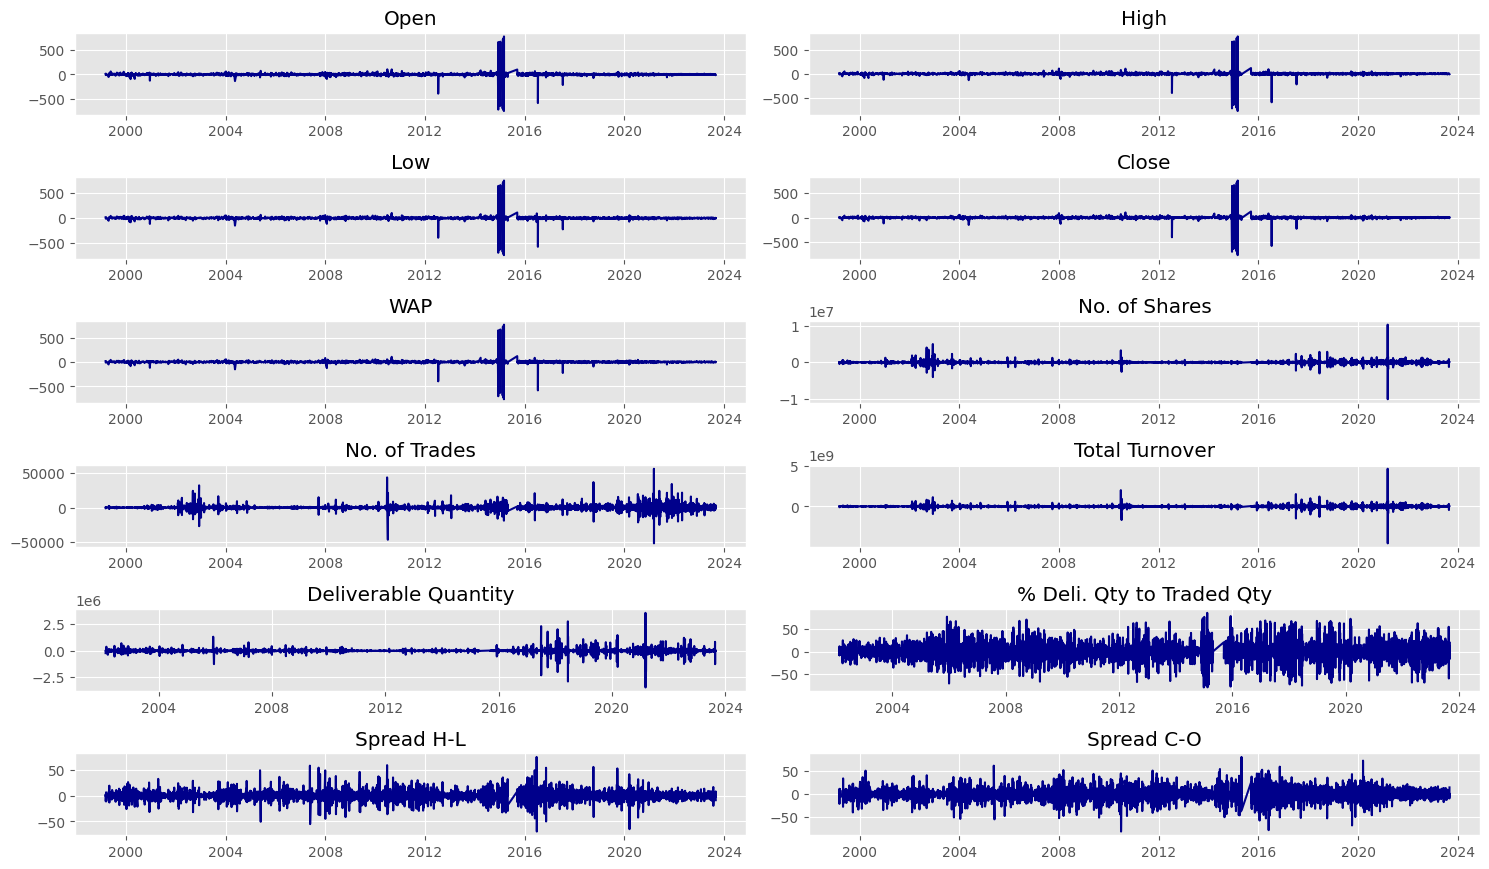

In [22]:
plt.figure(figsize = [15,10])
position = 1 
for column in df.columns:
    plt.subplot(7,2, position)
    plt.plot(df[column] , color = 'darkblue')
    plt.title(column)
    position+=1 
    plt.tight_layout()
plt.show()

#### Apart from the recurrent spikes from 2014 to 2015 if we observe data carefully then we get 5 different spikes on Close and Open raw data line plot.
#### One in 2000, 2004, 2012, 2016, 2017 

### There are few spikes in No. of shares, Total Turnover, No of Trades and Close and Open column

## Task 2 
##### 2. `Programmitically detect` any splits and consolidations that have occurred.

In [23]:
#  you're calculating the percentage change between each element and the 
# previous element in the bpcl_df DataFrame. 
# This can help detect any splits and consolidations that have occurred in the stock price data

# This line calculates the percentage change between each element and the previous element along the 
# columns (default behavior of pct_change()). 
# This effectively calculates the daily returns of the stock prices.
newdf = bpcl_df.pct_change(fill_method=None)
newdf

# The resulting newdf DataFrame will have the same shape as bpcl_df, but each value will represent 
# the percentage change from the previous value in the same column. Positive values indicate an 
# increase from the previous value, while negative values indicate a decrease.

# To detect splits and consolidations, you can look for significant changes in the 
# percentage change values. Splits and consolidations often result in a sudden and 
# significant change in the stock price, which would be reflected in the percentage change values.

# Keep in mind that this method is a basic approach and may not capture all splits and 
# consolidations accurately. Further analysis and domain knowledge may be required to 
# accurately detect and interpret splits and consolidations in the stock price data.

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
Date,,,,,,,,,,,,
1999-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-03-10,0.067911,0.079551,0.084211,0.044412,0.093029,0.153850,-0.035215,0.261191,NaN,NaN,0.020134,-0.333333
1999-03-11,0.048544,-0.014467,-0.029126,-0.053271,-0.042499,-0.799989,-0.637144,-0.808489,NaN,NaN,0.184211,-2.675000
1999-03-12,-0.059722,-0.064220,-0.016500,-0.006417,-0.036697,0.000854,-0.147929,-0.035874,NaN,NaN,-0.594444,-0.865672
1999-03-15,-0.007878,0.004412,0.001525,-0.018877,0.000090,-0.417687,-0.456597,-0.417635,NaN,NaN,0.082192,1.222222
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-28,0.008687,0.010731,0.008444,0.014849,0.010565,-0.025454,0.176850,-0.015146,0.263052,0.296108,0.178947,-2.388889
2023-08-29,0.003671,0.001956,0.007096,0.003799,0.002051,0.064143,0.252651,0.066303,0.429312,0.343081,-0.321429,0.040000
2023-08-30,-0.005486,-0.010597,-0.012683,-0.013875,-0.012228,-0.008226,-0.357852,-0.020344,-0.307809,-0.302100,0.184211,-2.307692


In [24]:
errors = newdf[abs(newdf['Close']) > 0.30] 
clean_errors = errors
errors

#  This threshold is arbitrary and can be adjusted. Greater than 30% is assumed as error
# Why Close column is used?
# The reason why the Close column is used specifically in this context could be 
# because the closing price is often considered a more stable and representative measure 
# of a stock's value compared to other price metrics (e.g., opening price, high price, low price). 
# Additionally, changes in the closing price are commonly used in financial analysis to detect 
# trends or abnormalities in stock price behavior.

# In this code snippet, you're filtering the newdf DataFrame to find rows where the 
# absolute percentage change in the 'Close' column is greater than 30%. Let's break down the code:

# errors = newdf[abs(newdf['Close']) > 0.30]: This line creates a new DataFrame 
# errors by filtering newdf to include only rows where the absolute percentage change 
# in the 'Close' column is greater than 30%.

# clean_errors = errors: This line assigns the errors DataFrame to clean_errors, 
# but it seems redundant and can be removed unless you plan to perform further operations 
# on clean_errors.

# errors: This line outputs the errors DataFrame, showing the rows where the 
# absolute percentage change in the 'Close' column is greater than 30%.

# By examining the errors DataFrame, you can identify instances where there are 
# large and potentially significant changes in the stock price, which may indicate splits 
# or consolidations or other significant events in the stock's history.

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
Date,,,,,,,,,,,,
2000-12-18,-0.514403,-0.502049,-0.498922,-0.492399,-0.499331,0.272748,0.047649,-3.627740e-01,NaN,NaN,-0.562500,-1.354839
2004-05-18,-0.287257,-0.275424,-0.328462,-0.314064,-0.322514,0.441289,0.666586,-2.354708e-02,-0.203251,-0.447172,1.144118,-2.180451
2012-07-13,-0.498037,-0.501584,-0.504672,-0.507262,-0.503471,0.276081,-0.071390,-3.663884e-01,0.273139,-0.002308,-0.322097,-1.408805
2014-12-10,-0.976655,-0.976794,-0.976044,-0.976125,-0.976372,-0.999314,-0.999398,-9.999838e-01,-0.997678,2.382950,-1.000000,-1.000000
2014-12-11,38.616519,39.117994,37.849558,38.023599,38.293388,5249.820000,4278.000000,2.063210e+05,2660.180000,-0.493200,inf,-inf
2014-12-17,-0.973050,-0.973958,-0.973001,-0.973747,-0.973690,-0.999510,-0.999816,-9.999871e-01,-0.998052,2.977725,-1.000000,-1.000000
2014-12-22,36.514451,36.997110,36.289017,36.884393,37.286471,80315.000000,1517.500000,3.075027e+06,36921.000000,-0.540300,inf,inf
2014-12-23,-0.973498,-0.973834,-0.973337,-0.973756,-0.973712,-0.999888,-0.999341,-9.999971e-01,-0.999756,1.175332,-1.000000,-1.000000
2014-12-30,36.750000,37.229651,36.514535,36.779070,37.079486,7343.444444,1853.000000,2.796538e+05,1412.444444,-0.807500,inf,inf


In [25]:
# the most common stock split is 1/2 ,1/3 or 2/3 and it wouldn't be feasible if a company does more than 67% split 
# SO any thing beyond that should be excluded 
errors[abs(errors['Close']) < 0.67]


# In this code snippet, you're further filtering the errors DataFrame to exclude 
# rows where the absolute percentage change in the 'Close' column is greater than 67%. 
# This is based on the assumption that the most common stock splits are 1/2, 1/3, or 2/3, 
# and it wouldn't be feasible for a company to do more than a 67% split. Let's break down the code:

# errors[abs(errors['Close']) < 0.67]: This line filters the errors DataFrame to 
# include only rows where the absolute percentage change in the 'Close' column is less 
# than 67%. This effectively excludes rows where the stock price change is greater than 67%, 
# which are considered beyond the feasible range for common stock splits.

# By applying this filter, you focus on the potential stock splits that are within a 
# reasonable range based on common practices, helping to identify significant events in 
# the stock's history that are more likely to be actual splits or consolidations.

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
Date,,,,,,,,,,,,
2000-12-18,-0.514403,-0.502049,-0.498922,-0.492399,-0.499331,0.272748,0.047649,-0.362774,NaN,NaN,-0.562500,-1.354839
2004-05-18,-0.287257,-0.275424,-0.328462,-0.314064,-0.322514,0.441289,0.666586,-0.023547,-0.203251,-0.447172,1.144118,-2.180451
2012-07-13,-0.498037,-0.501584,-0.504672,-0.507262,-0.503471,0.276081,-0.071390,-0.366388,0.273139,-0.002308,-0.322097,-1.408805
2016-07-13,-0.506630,-0.509827,-0.512780,-0.513347,-0.512129,0.613536,-0.336958,-0.212797,1.074924,0.285880,-0.421896,-0.102151
2017-07-13,-0.311730,-0.316739,-0.330412,-0.330191,-0.328410,1.023680,0.325251,0.359079,0.527176,-0.245388,0.843750,-6.186047


Looking at the above data we can see that when the stock split occured the closing prices changed dramatically

Tere could be several reasons why the shift in the closing price of two different days may indicate a stock split, but no stock split was announced. Some possible reasons are:

Market volatility: Market conditions can cause fluctuations in the stock price, even if no major events such as a stock split have occurred.

Corporate news or announcements: Company-specific news, such as earnings reports or management changes, can also impact the stock price and cause large shifts.

Technical factors: Technical factors, such as trading volumes, can also impact the stock price and cause fluctuations.

Data error: There is always the possibility of data errors, such as typos or incorrect data inputs, that can result in incorrect stock price information.

It's important to consider multiple sources of information and not rely solely on a single dataset when analyzing stocks. It's also recommended to use multiple analytical methods to confirm the results and cross-reference with other sources to ensure accuracy.

#### Technical factors, such as trading volumes, can also impact the stock price and cause fluctuations.
Here we are having No of trades feature which shows that the shift in prices are definetely due to intra-day trading 
So we can re-filter the data that are no affected due to intraday trades

It can also occur due to incorrect entry but we can't verify it because of source limitations

In [26]:
errors  = errors[(abs(errors['Close']) < 0.67) & (abs(errors['No. of Trades'])<0.40)]
errors
# ie less than 40% of trades have taken place assuming that the majority shares are held by govt 

# In this code snippet, you're further refining the errors DataFrame by applying an 
# additional filter based on the percentage change in the 'No. of Trades' column. 
# Let's break down the code:

# errors = errors[(abs(errors['Close']) < 0.67) & (abs(errors['No. of Trades']) < 0.40)]: 
# This line filters the errors DataFrame to include only rows where both conditions are met:

# The absolute percentage change in the 'Close' column is less than 67%.
# The absolute percentage change in the 'No. of Trades' column is less than 40%.
# By using the & operator, you're applying a logical AND operation, ensuring that both 
# conditions must be true for a row to be included in the errors DataFrame.

# errors: This line outputs the filtered errors DataFrame, showing rows where both conditions 
# are met.

# The second condition, which filters based on the percentage change in the number of trades, 
# is aimed at excluding cases where a large change in stock price might be due to a low volume of trades, 
# which could indicate less reliable or less significant price movements. 
# This assumption is based on the idea that if the majority of shares are held by the government, 
# there may be fewer trades overall.


,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
Date,,,,,,,,,,,,
2000-12-18,-0.514403,-0.502049,-0.498922,-0.492399,-0.499331,0.272748,0.047649,-0.362774,NaN,NaN,-0.562500,-1.354839
2012-07-13,-0.498037,-0.501584,-0.504672,-0.507262,-0.503471,0.276081,-0.071390,-0.366388,0.273139,-0.002308,-0.322097,-1.408805
2016-07-13,-0.506630,-0.509827,-0.512780,-0.513347,-0.512129,0.613536,-0.336958,-0.212797,1.074924,0.285880,-0.421896,-0.102151
2017-07-13,-0.311730,-0.316739,-0.330412,-0.330191,-0.328410,1.023680,0.325251,0.359079,0.527176,-0.245388,0.843750,-6.186047


## Task 3 
##### 3. Correct the stock prices for any `splits and consolidations` that have occurred.

In [27]:
# hence in order to get all entries where the split occured we can index them and create a new column 
bpcl_df['Splits/Consolidation'] = np.nan

# In this code snippet, you're adding a new column 'Splits/Consolidation' to the bpcl_df 
# DataFrame and initializing it with NaN values. 
# This column will be used to indicate whether a split or consolidation has occurred for 
# each row of the DataFrame. Let's break down the code:

# bpcl_df['Splits/Consolidation'] = np.nan: This line creates a new column 'Splits/Consolidation' in the bpcl_df DataFrame and fills it with NaN values. This column will be used to store information about splits or consolidations that have occurred.
# By adding this column, you're preparing the DataFrame to track and record information about any splits or consolidations that need to be corrected in the stock prices.

In [28]:
cumulative_multiple = 1
for date in errors.index[::-1] :
#     bpcl_df[date , 'Splits/Consolidation'] = errors.loc[date,'WAP']
    cumulative_multiple *= (1-abs(errors.loc[str(date) , 'WAP']))
    bpcl_df.loc[str(date), 'Splits/Consolidation'] = cumulative_multiple
    print(cumulative_multiple)

# In this code snippet, you're iterating over the errors DataFrame in reverse order 
# (using errors.index[::-1]) and calculating a cumulative multiple based on the 
# 'WAP' (Weighted Average Price) values. Let's break down the code:

# cumulative_multiple = 1: Initializes a variable cumulative_multiple to 1. 
# This variable will be used to calculate the cumulative multiple for each row.

# for date in errors.index[::-1]:: Iterates over the index of the errors DataFrame in reverse order.

# cumulative_multiple *= (1-abs(errors.loc[str(date), 'WAP'])): 
# Calculates the cumulative multiple by multiplying the current cumulative_multiple 
# with (1 - abs(errors.loc[str(date), 'WAP'])). 
# This calculation is based on the assumption that the 'WAP' column in errors 
# contains the correction factor for splits or consolidations.

# bpcl_df.loc[str(date), 'Splits/Consolidation'] = cumulative_multiple: 
# Assigns the calculated cumulative_multiple to the 'Splits/Consolidation' column of 
# bpcl_df at the corresponding date index.

# print(cumulative_multiple): Prints the cumulative multiple for each date. 
# This can be helpful for debugging and understanding the calculation process.

# By calculating and assigning the cumulative multiple for each date, 
# you're preparing to use this information to correct the stock prices for any splits or 
# consolidations that have occurred.

0.6715902775746586
0.3276492609502214
0.16268746771908787
0.08145262358583408


In [29]:
# bpcl_df['Splits/Consolidation']

In [30]:
bpcl_df['Splits/Consolidation']= bpcl_df['Splits/Consolidation'].bfill()
# Backward filling the missing values.

In [31]:
# bpcl_df['Splits/Consolidation']

In [32]:
# bpcl_df['Splits/Consolidation'].isna().sum()

In [33]:
# bpcl_df['Splits/Consolidation'].replace(np.nan , 1, inplace = True)
bpcl_df['Splits/Consolidation'] = bpcl_df['Splits/Consolidation'].replace(np.nan, 1)

# But why replacing nan with 1?
# Replacing NaN (missing values) with 1 in the 'Splits/Consolidation' column is a 
# common approach when dealing with stock splits and consolidations in financial data analysis. 
# Here's why:

# Adjustment Factor: The 'Splits/Consolidation' column is often used to store an adjustment 
# factor that accounts for stock splits and consolidations. By default, before any splits or 
# consolidations occur, this factor is 1 (indicating no change).

# Missing Values: NaN values in the 'Splits/Consolidation' column typically occur for 
# dates where there were no splits or consolidations, or where the data is not available. 
# Since there was no change in the number of shares (or the price per share) on these dates, 
# it's appropriate to replace these missing values with 1 to indicate that there was no 
# adjustment needed.

# Calculation: In calculations involving stock prices and adjusted prices (e.g., to account 
# for splits or consolidations), multiplying by 1 has no effect on the original price. 
# This maintains the integrity of the analysis for dates without splits or consolidations.

# By replacing NaN with 1, you're essentially treating those dates as if there 
# were no splits or consolidations, which is a reasonable assumption for many analyses.

In [34]:
(bpcl_df['Splits/Consolidation'].shape, bpcl_df['Close'].shape)
# Testing if the shape is equal or not


((4118,), (4118,))

In [35]:
bpcl_df['AdjClose'] = bpcl_df['Close'] * bpcl_df['Splits/Consolidation']
bpcl_df['AdjClose']

# In this code snippet, you're creating a new column 'AdjClose' 
# in the bpcl_df DataFrame by multiplying the 'Close' column with the 'Splits/Consolidation' column. 
# This calculation is used to adjust the stock prices for any splits or consolidations 
# that have occurred. Here's a breakdown of the code:

# bpcl_df['AdjClose']: This creates a new column 'AdjClose' in the bpcl_df DataFrame.

# bpcl_df['Close'] * bpcl_df['Splits/Consolidation']: This calculates the adjusted closing prices by 
# multiplying the 'Close' column (original closing prices) with the 
# 'Splits/Consolidation' column (cumulative multiples for splits/consolidations).

# The result is that the 'AdjClose' column will contain the adjusted closing prices, 
# which account for any splits or consolidations that have occurred, 
# allowing for a more accurate representation of the stock's price history.

Date
1999-03-09     16.689643
1999-03-10     17.430861
1999-03-11     16.502302
1999-03-12     16.396413
1999-03-15     16.086893
                 ...    
2023-08-28    355.400000
2023-08-29    356.750000
2023-08-30    351.800000
2023-08-31    340.550000
2023-09-01    344.100000
Name: AdjClose, Length: 4118, dtype: float64

In [36]:
cumulative_multiple = 1
for date in errors.index[::-1] :
    bpcl_df.loc[str(date) , 'AdjClose']  = cumulative_multiple * bpcl_df.loc[str(date), 'Close']
    cumulative_multiple *= (1-abs(errors.loc[str(date) , 'WAP']))
    

# In this code snippet, you're iterating over the errors DataFrame in 
# reverse order and adjusting the 'AdjClose' column in the bpcl_df DataFrame for 
# each date based on the cumulative multiple and the original closing price. 
    # Let's break down the code:

# cumulative_multiple = 1: Initializes a variable cumulative_multiple to 1. 
# This variable will be used to calculate the cumulative multiple for each row.

# for date in errors.index[::-1]:: Iterates over the index of the errors DataFrame in reverse order.

# bpcl_df.loc[str(date), 'AdjClose'] = cumulative_multiple * bpcl_df.loc[str(date), 'Close']: 
# Calculates the adjusted closing price for the current date by multiplying the 
# cumulative_multiple with the original closing price ('Close' column) at that date and 
# assigns it to the 'AdjClose' column of bpcl_df at the corresponding date index.

# cumulative_multiple *= (1 - abs(errors.loc[str(date), 'WAP'])): 
# Updates the cumulative_multiple by multiplying it with (1 - abs(errors.loc[str(date), 'WAP'])). 
# This calculation is based on the assumption that the 'WAP' column in errors contains 
# the correction factor for splits or consolidations.

# By iterating over the errors DataFrame in reverse order and adjusting the 
# 'AdjClose' column for each date, you're effectively correcting the stock prices for 
# any splits or consolidations that have occurred.

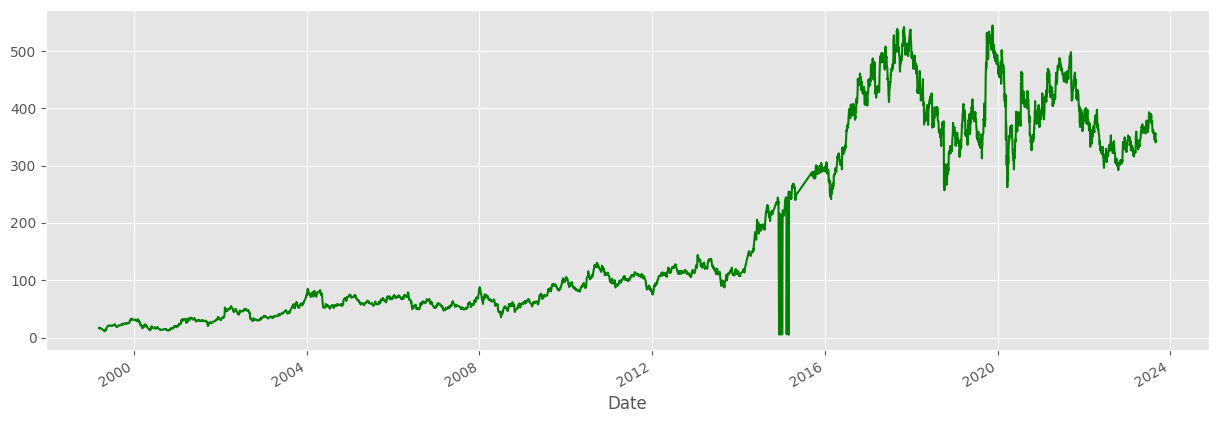

In [37]:
bpcl_df['AdjClose'].plot(figsize = [15,5] , color = 'Green')
# plt.axvline('2000-12-18')
plt.show()

In [38]:
incorrect_inputs = bpcl_df.loc[clean_errors[clean_errors.index.isin(errors.index) == False].index].pct_change().loc[:,['Close']]<0


# In this code snippet, you're identifying rows in the bpcl_df DataFrame where the 
# percentage change in the 'Close' column is less than 0 for dates that are not 
# in the errors DataFrame. Let's break down the code:

# clean_errors.index.isin(errors.index): This checks if the index of clean_errors DataFrame 
# is present in the index of errors DataFrame, resulting in a boolean mask.

# clean_errors[clean_errors.index.isin(errors.index) == False]: This selects rows from 
# clean_errors where the index is not present in the index of errors.

# bpcl_df.loc[...]: This selects rows from bpcl_df based on the index of the rows selected 
# in the previous step.

# .pct_change(): This calculates the percentage change between each element and the previous 
# element in the selected rows.

# .loc[:, ['Close']]: This selects only the 'Close' column from the calculated percentage 
# change DataFrame.

# < 0: This checks if the percentage change in the 'Close' column is less than 0, resulting i
# n a boolean Series indicating incorrect inputs.

# By using this code, you can identify instances where the stock price decreased on dates 
# that are not associated with splits or consolidations, which may indicate incorrect or 
# unusual data.

In [39]:
incorrect_inputs

,Close
Date,
2004-05-18,False
2014-12-10,True
2014-12-11,False
2014-12-17,True
2014-12-22,False
2014-12-23,True
2014-12-30,False
2015-01-05,True
2015-01-09,False


In [40]:
incorrect_inputs = bpcl_df.loc[incorrect_inputs[incorrect_inputs['Close']== True].index]
incorrect_inputs

# In this code snippet, you're filtering the bpcl_df DataFrame to include only rows where
#  the 'Close' column has a percentage change less than 0 (incorrect_inputs['Close'] == True). Let's break down the code:

# incorrect_inputs['Close'] == True: This creates a boolean mask where True indicates rows
#  where the 'Close' column has a percentage change less than 0.

# incorrect_inputs[incorrect_inputs['Close'] == True]: This filters the incorrect_inputs
#  DataFrame to include only rows where the 'Close' column has a percentage change less than 0.

# bpcl_df.loc[...]: This selects rows from the bpcl_df DataFrame based on the index of
#  the rows selected in the previous step.

# By using this code, you can identify and isolate rows in the bpcl_df DataFrame where 
# the stock price decreased when it was not expected, which may indicate incorrect or unusual data.

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O,Splits/Consolidation,AdjClose
Date,,,,,,,,,,,,,,
2014-12-10,16.95,16.95,16.95,16.95,16.94,50.0,2.0,847.0,50.0,100.0,0.0,0.0,0.327649,5.553655
2014-12-17,17.00,17.00,17.00,17.00,17.00,100.0,2.0,1700.0,100.0,100.0,0.0,0.0,0.327649,5.570037
2014-12-23,17.20,17.20,17.20,17.20,17.11,9.0,2.0,154.0,9.0,100.0,0.0,0.0,0.327649,5.635567
2015-01-05,16.70,16.70,16.70,16.70,16.70,193.0,3.0,3223.0,193.0,100.0,0.0,0.0,0.327649,5.471743
2015-02-12,18.35,18.35,18.35,18.35,18.00,2.0,2.0,36.0,2.0,100.0,0.0,0.0,0.327649,6.012364
2015-02-23,18.00,18.00,18.00,18.00,18.00,1105.0,6.0,19890.0,1105.0,100.0,0.0,0.0,0.327649,5.897687
2015-03-03,16.55,16.55,16.55,16.55,16.55,195.0,5.0,3227.0,195.0,100.0,0.0,0.0,0.327649,5.422595


In [41]:
incorrect_inputs.shape

(7, 14)

In [42]:
incorrect_inputs.index

DatetimeIndex(['2014-12-10', '2014-12-17', '2014-12-23', '2015-01-05',
               '2015-02-12', '2015-02-23', '2015-03-03'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [43]:
# Droping data or index
bpcl_df.drop(index = incorrect_inputs.index , inplace = True)

In [44]:
bpcl_df['AdjClose']

Date
1999-03-09     16.689643
1999-03-10     17.430861
1999-03-11     16.502302
1999-03-12     16.396413
1999-03-15     16.086893
                 ...    
2023-08-28    355.400000
2023-08-29    356.750000
2023-08-30    351.800000
2023-08-31    340.550000
2023-09-01    344.100000
Name: AdjClose, Length: 4111, dtype: float64

<Axes: xlabel='Date'>

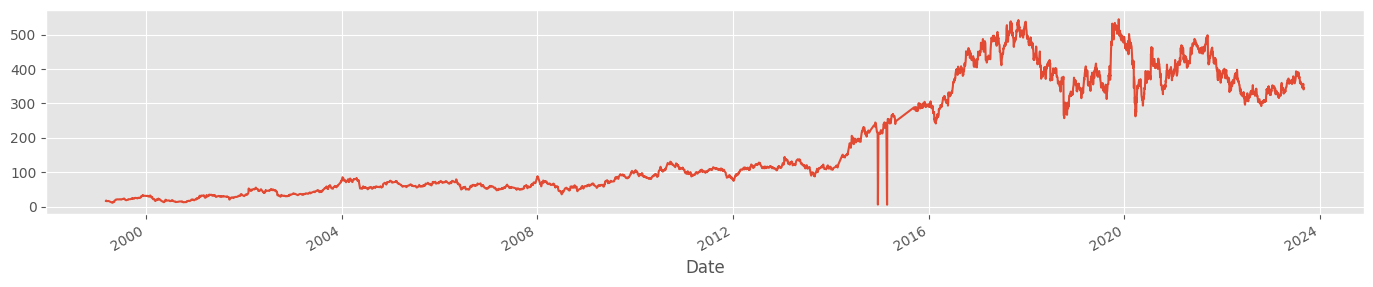

In [45]:
bpcl_df['AdjClose'].plot(kind='line' , figsize = [17,3])

In [46]:
# incorrect_inputs

In [47]:
while len(incorrect_inputs)>0:
    newdf = bpcl_df.pct_change()
    errors = newdf[abs(newdf['Close']) > 0.30]
    clean_errors = errors
    errors  = errors[(abs(errors['Close']) < 0.67) & (abs(errors['No. of Trades'])<0.40)]
    incorrect_inputs = bpcl_df.loc[clean_errors[clean_errors.index.isin(errors.index) == False].index].pct_change().loc[:,['Close']]<0
    incorrect_inputs = bpcl_df.loc[incorrect_inputs[incorrect_inputs['Close']== True].index]
    bpcl_df.drop(index = incorrect_inputs.index , inplace = True)

# In this code snippet, you're iterating over the bpcl_df DataFrame in a loop to
#  identify and remove incorrect inputs. Here's a breakdown of the code:

# while len(incorrect_inputs) > 0:: This starts a loop that continues as long as
#  there are rows in bpcl_df with incorrect inputs.

# newdf = bpcl_df.pct_change(): This calculates the percentage change between each 
# element and the previous element in the bpcl_df DataFrame.

# errors = newdf[abs(newdf['Close']) > 0.30]: This identifies rows in the newdf 
# DataFrame where the absolute percentage change in the 'Close' column is greater than 30%.

# clean_errors = errors: This creates a copy of the errors DataFrame.

# errors = errors[(abs(errors['Close']) < 0.67) & (abs(errors['No. of Trades']) < 0.40)]: 
# This further filters the errors DataFrame to exclude rows where the absolute percentage 
# change in the 'Close' column is greater than 67% and the absolute percentage change 
# in the 'No. of Trades' column is greater than 40%.

# incorrect_inputs = ...: This line redefines incorrect_inputs based on the new set of errors.

# incorrect_inputs = ...: This line filters the bpcl_df DataFrame to include only rows 
# where the 'Close' column has a percentage change less than 0.

# bpcl_df.drop(index=incorrect_inputs.index, inplace=True): This removes the rows 
# identified as incorrect inputs from the bpcl_df DataFrame.

# This loop iterates over the bpcl_df DataFrame, progressively refining the criteria for 
# identifying incorrect inputs and removing them from the DataFrame. The loop continues 
# until there are no more rows with incorrect inputs in bpcl_df.

/tmp/ipykernel_3017/2522990590.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  newdf = bpcl_df.pct_change()
/tmp/ipykernel_3017/2522990590.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  newdf = bpcl_df.pct_change()
/tmp/ipykernel_3017/2522990590.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  newdf = bpcl_df.pct_change()


In [48]:
def annotation(index):
    plt.annotate('Split', (mdates.date2num(errors.index[index]), bpcl_df.loc[errors.index,'AdjClose'][index]), xytext=(18, 10), 
            textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))
    

# This annotation function is designed to annotate a specific point on a plot with 
# the text "Split" and an arrow pointing to that point. Here's a breakdown of the function:

# def annotation(index): - This defines a function named annotation that takes an 
# index parameter.

# plt.annotate('Split', ...) - This is a Matplotlib function used to annotate a 
# point on a plot. It takes several arguments:

# 'Split' - The text to be displayed as the annotation.
# (mdates.date2num(errors.index[index]), bpcl_df.loc[errors.index,'AdjClose'][index]) - 
# The coordinates of the point to annotate. mdates.date2num(errors.index[index]) 
# converts the date index to a format that Matplotlib understands, and 
# bpcl_df.loc[errors.index,'AdjClose'][index] gets the corresponding adjusted 
# closing price at that index.
# xytext=(18, 10) - The offset of the text from the annotated point, in points.
# textcoords='offset points' - Specifies that the xytext coordinates are offset from the 
# annotated point.
# arrowprops=dict(arrowstyle='-|>') - Specifies the style of the arrow pointing to the 
# annotated point.
# This function can be used to add annotations to a plot at specific points, such as 
# indicating where a split occurred in the stock price data.

## Task 4
##### 4. Display the final adjusted stock prices.

/tmp/ipykernel_3017/3808525476.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate('Split', (mdates.date2num(errors.index[index]), bpcl_df.loc[errors.index,'AdjClose'][index]), xytext=(18, 10),


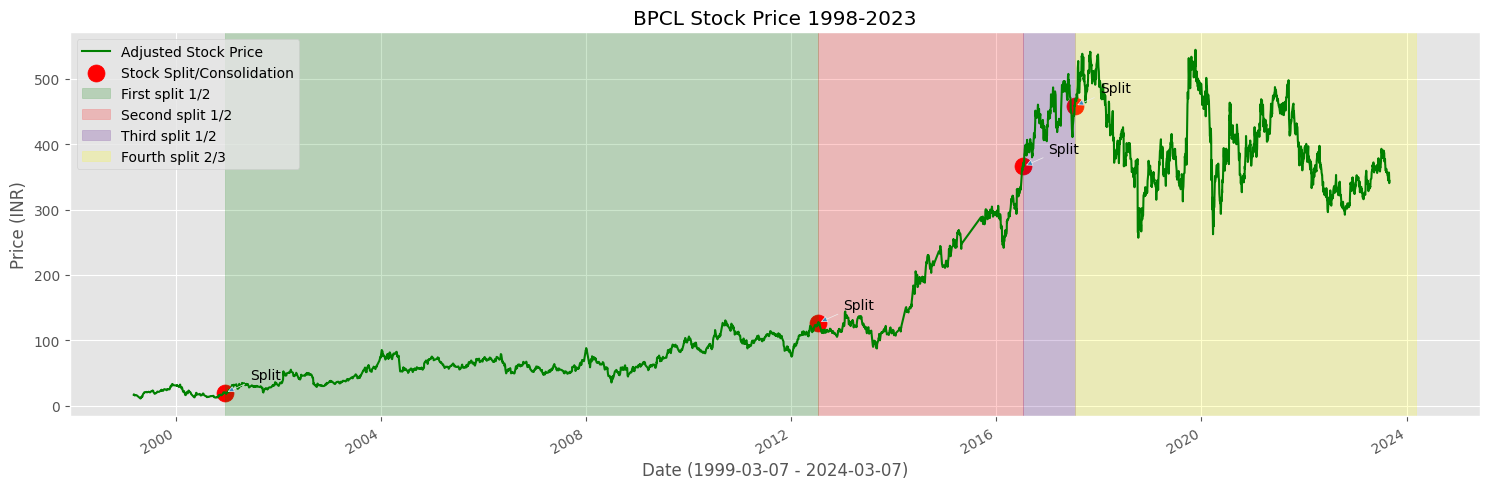

In [49]:
bpcl_df['AdjClose'].plot(kind='line' , figsize = [15,5] , color = 'Green' , label= 'Adjusted Stock Price')
# for date in errors.index:
#     plt.axvline(date , color = 'Green')
plt.scatter(x=errors.index , y= bpcl_df.loc[errors.index,'AdjClose'] , s = 150 , c = 'Red' , label = 'Stock Split/Consolidation')


plt.title('BPCL Stock Price 1998-2023')
plt.xlabel(f'Date ({START_DATE} - {CURRENT_DATE})')
plt.ylabel('Price (INR)')
plt.axvspan(errors.index[0], errors.index[1], alpha=0.2, color="green" , label = 'First split 1/2')
plt.axvspan(errors.index[1], errors.index[2], alpha=0.2, color="red" , label = 'Second split 1/2')
plt.axvspan(errors.index[2], errors.index[3], alpha=0.2, color="indigo" , label = 'Third split 1/2')
plt.axvspan(errors.index[3], datetime.now(), alpha=0.2, color="yellow" , label = 'Fourth split 2/3')

for index in range(len(errors)):
    annotation(index)

plt.legend()
plt.tight_layout()
plt.show()

# This code snippet generates a plot of the final adjusted stock prices 
# for BPCL, along with annotations for stock splits/consolidations. Here's a breakdown of the code:

# bpcl_df['AdjClose'].plot(...): This plots the adjusted closing prices ('AdjClose' column) 
# of BPCL stock over time.

# plt.scatter(...): This adds scatter points to the plot to indicate the dates of 
# stock splits/consolidations. The x=errors.index and y=bpcl_df.loc[errors.index,'AdjClose'] 
# arguments specify the coordinates of the scatter points.

# plt.axvspan(...): This adds vertical shaded regions to the plot to highlight the 
# periods of stock splits/consolidations. The alpha argument controls the transparency of the 
# shaded regions.

# for index in range(len(errors)): annotation(index): This loop calls the annotation 
# function for each stock split/consolidation to annotate the plot with the text "Split" 
# at the corresponding points.

# plt.legend(): This displays the legend on the plot.

# plt.tight_layout(): This adjusts the subplot parameters to give the plot a better layout.

# plt.show(): This displays the plot.

# Overall, this code generates a plot that visualizes the adjusted stock prices for BPCL 
# over time, with annotations and shaded regions indicating stock splits/consolidations.

## Task 5 
5. Show the dates for any splits and consolidations that have occurred.

####  Dates for which splits / consolidation occured 
##### ['2000-12-18',         '2012-07-13',          '2016-07-13',           '2017-07-13']

In [50]:
errors

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O,Splits/Consolidation,AdjClose
Date,,,,,,,,,,,,,,
2000-12-18,-0.514403,-0.502049,-0.498922,-0.492399,-0.499331,0.272748,0.047649,-0.362774,NaN,NaN,-0.562500,-1.354839,0.0,0.013846
2012-07-13,-0.498037,-0.501584,-0.504672,-0.507262,-0.503471,0.276081,-0.071390,-0.366388,0.273139,-0.002308,-0.322097,-1.408805,0.0,-0.007636
2016-07-13,-0.506630,-0.509827,-0.512780,-0.513347,-0.512129,0.613536,-0.336958,-0.212797,1.074924,0.285880,-0.421896,-0.102151,0.0,-0.002496
2017-07-13,-0.311730,-0.316739,-0.330412,-0.330191,-0.328410,1.023680,0.325251,0.359079,0.527176,-0.245388,0.843750,-6.186047,0.0,-0.002652


In [51]:
errors.index

# This code snippet simply displays the index of the errors DataFrame, 
# which contains the dates for any splits and consolidations that have occurred 
# in the stock price data. The errors.index attribute returns the index (dates) of the DataFrame.

DatetimeIndex(['2000-12-18', '2012-07-13', '2016-07-13', '2017-07-13'], dtype='datetime64[ns]', name='Date', freq=None)

## Project Summary 
The code imports the necessary libraries such as , Pandas, Matplotlib, and Seaborn. It also sets the maximum number of rows to display in the output to None. The API key for Nasdaq-Data-Link or Quandl is stored in the variable "API_KEY".

The stock code for Bharat Petroleum Corporation Limited (BPCL) is stored in the variable "BPCL_code". The current date and the start date (25 years prior to the current date) are calculated using the datetime library and stored as "CURRENT_DATE" and "START_DATE", respectively. The stock data for BPCL is then fetched from Nasdaq-Data-Link or Quandl using the start and end dates and stored in the data frame "bpcl_df".

The code then plots a line graph to show the stock price of BPCL over time and also plots subplots for each column in the data frame to show the trends in each feature.

In the next section, the code fetches the difference in the stock price data and plots subplots to show the trends in each feature. The code also calculates the percentage change in the "Close" feature and identifies errors where the absolute value of the change exceeds `0.30`. The code then removes any errors where the absolute change exceeds `0.67`, as it could'nt indicate a stock split, which is not feasible.

The code finally concludes that the spike in the stock price in few years could be due to several factors such as market volatility, corporate news or announcements, technical factors, or data errors. It is important to consider multiple sources of information and not rely solely on a single dataset when analyzing stocks.

### Note : 
In the above notebook there were multiple noisy features from <font color=red>2014 to 2015</font> and given the quick succession of 
changes that occured in the short of time it is assumed that these were errors and not real market changes.

In [52]:
!pip freeze --local > requirements.txt